In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


In [ ]:
ls

 177975622.jpg  'Copy of coco.names'  'Copy of yolov4.cfg'
 car.jpeg       'Copy of image.jpg'   'Copy of yolov4.weights'


In [ ]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
confidence = 0.6
Nms= 0.3
class_names = []
with open("Copy of coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]

In [ ]:
img = cv2.imread("car.jpeg")
arc = cv2.dnn.readNet("Copy of yolov4.weights","Copy of yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)  # Higher the fps better the model.

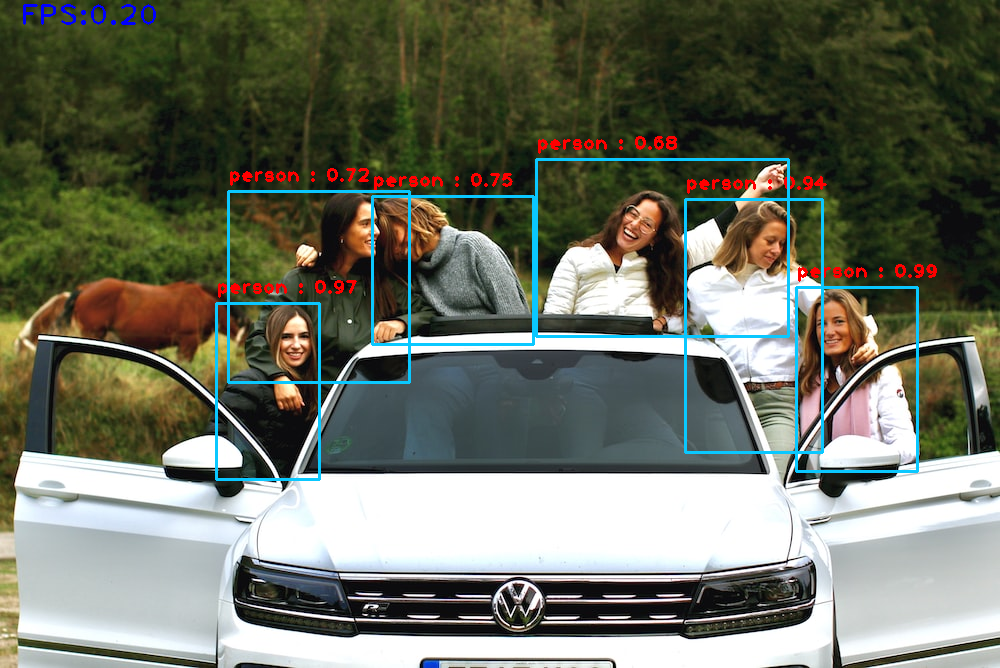

In [ ]:
for (classid, score, box) in zip(classes, scores, boxes):
    if isinstance(classid, (list, np.ndarray)):
        classid_value = classid[0]
    else:
        classid_value = classid
    if class_names[classid_value] == 'person':
        if isinstance(score, (list, np.ndarray)):
            score_value = score[0]
        else:
            score_value = score
        label = "person : %.2f" % score_value
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.25, (0, 0, 255), 2)
cv2.putText(img, "FPS:{0:.2f}".format(fps), (20, 25), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 0), thickness=2)
cv2_imshow(img)